In [16]:
from sklearn.datasets import make_moons
from sklearn import model_selection
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
from mglearn.plot_interactive_tree import plot_tree_partition
from mglearn.plot_2d_separator import plot_2d_separator
from mglearn.tools import discrete_scatter

In [54]:
#X, y = make_moons(n_samples=100, noise=0.25)
rawData = pd.read_csv("../../DataSet/winequality-white.csv", delimiter=";")
X = rawData.values[:, 0:2]
y = rawData.values[:, -1]
y_binary = np.where(y<6, 0, 1)
X

array([[7.  , 0.27],
       [6.3 , 0.3 ],
       [8.1 , 0.28],
       ...,
       [6.5 , 0.24],
       [5.5 , 0.29],
       [6.  , 0.21]])

In [55]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_binary, train_size=0.7)

In [56]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(n_estimators=10)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)

[DecisionTreeClassifier(random_state=1661845191), DecisionTreeClassifier(random_state=2025629499), DecisionTreeClassifier(random_state=754335951), DecisionTreeClassifier(random_state=1405054697), DecisionTreeClassifier(random_state=1902727124), DecisionTreeClassifier(random_state=177425231), DecisionTreeClassifier(random_state=562103115), DecisionTreeClassifier(random_state=1278355841), DecisionTreeClassifier(random_state=259619509), DecisionTreeClassifier(random_state=881607324)]


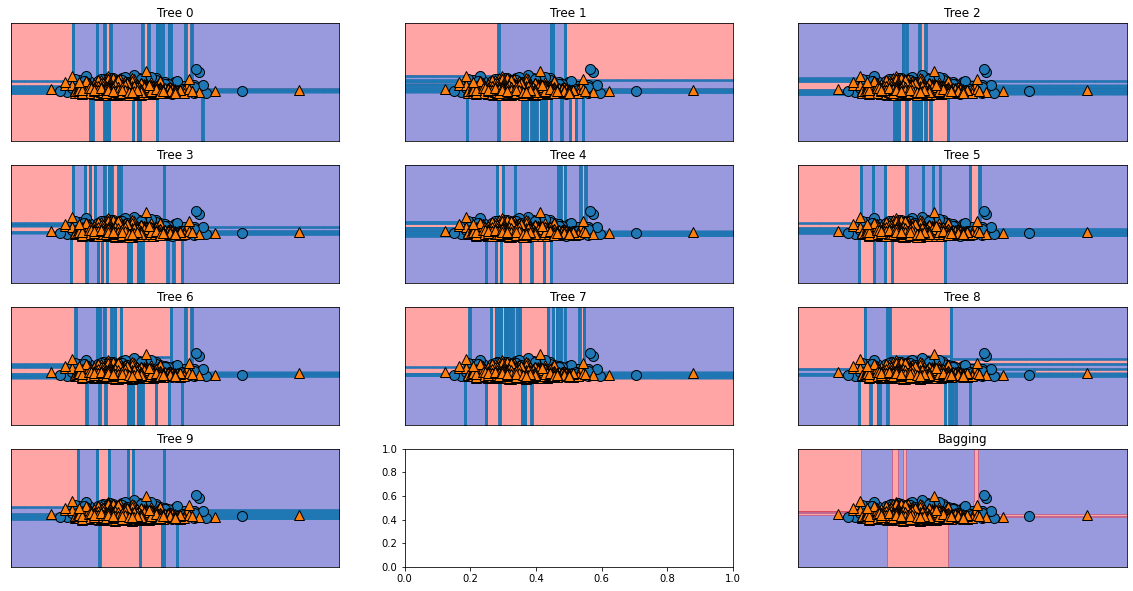

In [57]:
fig, axes = plt.subplots(4, 3, figsize=(20, 10))
print(bagging.estimators_)
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("Tree {}".format(i))
    plot_tree_partition(X_train, y_train, tree, ax=ax)
plot_2d_separator(bagging, X_train, fill=True, ax=axes[-1, -1],
                                    alpha=.4)
axes[-1, -1].set_title("Bagging")
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [15]:
bagging.score

<bound method ClassifierMixin.score of BaggingClassifier(n_estimators=5)>